In [3]:
import numpy as np
import pandas as pd
import re
from datetime import datetime as dt
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Plataforma\\')
sys.path.append(path_file)
from datamanager_updated import DataManager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [10]:
path_general = 'D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Girardota\\Datos_Simple4\\'


#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_total = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_total.append(load_file)
df_total = pd.concat(df_total)
df_total.reset_index(drop=True, inplace=True)

In [11]:
df_total["datetime"] = df_total["date"]+" "+df_total["time"]

In [12]:
df_total.drop("date", axis=1, inplace=True)
df_total.drop("time", axis=1, inplace=True)

In [7]:
df_total["datetime"] = pd.to_datetime(df_total["datetime"])

In [14]:
df_total.set_index(df_total["datetime"], drop=True, inplace=True)
df_total.drop("datetime", axis=1, inplace=True)
# df_total.drop("latitude", axis=1, inplace=True)
# df_total.drop("longitude", axis=1, inplace=True)

In [15]:
df_total

,PM01,PM2_5,PM10,CO,NOx,NH3,O3,NO2
datetime,,,,,,,,
2023-12-15 18:47:00,10.20,14.80,32.68,2.52,0.01,5.35,38.11,0.04
2023-12-15 18:48:00,10.88,14.80,32.68,2.52,0.01,5.34,38.04,0.04
2023-12-15 18:49:00,10.88,14.80,32.68,2.52,0.01,5.35,37.52,0.04
2023-12-15 18:50:00,10.88,14.40,32.68,3.04,0.01,6.46,38.67,0.04
2023-12-15 18:51:00,10.88,14.40,32.68,3.55,0.01,7.53,38.53,0.04
2023-12-15 18:52:00,10.88,14.40,32.68,3.62,0.01,7.69,39.77,0.04
2023-12-15 18:53:00,10.88,13.60,32.68,3.28,0.01,6.96,37.90,0.04
2023-12-15 18:54:00,10.88,13.60,32.68,5.49,0.01,11.64,37.41,0.04
2023-12-15 18:55:00,10.88,13.60,32.68,4.45,0.01,9.42,38.91,0.04


In [460]:
Datamanager = DataManager(dataframe=df_siata2_new)
df_girardota = Datamanager.load_data()

entre


In [461]:
Datamanager.show_period(df_girardota)

La fecha inical del conjunto de datos es 2023-12-15 19:00:00
La fecha final del conjunto de datos es 2023-12-22 08:00:00
No es clara la frecuencia. La frecuencia inicial es 1 minutos
El rango de datos es de: 6 days 13:00:00
El dataset tiene en total 9421 registros 
El dataset no tiene datos repetidos
Los datos están completos, no hay que reindexar
De los 9421 registros válidos el 10.07% fueron NAN.
Además, teniendo en cuenta la fecha inicial y final y la frecuencia de los registros
El máximo posible de registro es de 9421, en este sentido se determina que el sensor 
registró 100.0% del tiempo total


,O3,NO,NO2,NOx,SO2
2023-12-15 19:00:00,11.8,NaN,NaN,NaN,2.088
2023-12-15 19:01:00,10.6,0.5,10.9,11.4,2.121
2023-12-15 19:02:00,9.9,0.6,11.1,11.6,2.115
2023-12-15 19:03:00,10.3,0.6,11.1,11.7,2.086
2023-12-15 19:04:00,10.7,0.6,11.1,11.7,2.195
2023-12-15 19:05:00,10.9,0.8,11.1,11.8,2.096
2023-12-15 19:06:00,10.9,0.9,11.3,12.2,2.210
2023-12-15 19:07:00,11.3,0.9,11.2,12.1,2.259
2023-12-15 19:08:00,10.3,1.0,10.9,12.0,2.190
2023-12-15 19:09:00,9.6,1.1,10.6,11.7,2.147


In [243]:
def gas_plots(data=[df_total, df_siata_total],labels=["Simple", "Vaisala"],variables=["CO (ppm)" "O3 (ppm)"],
              colors=["blue", "black"],unit="ppm",figsize=(20,5)):
    fig = plt.figure(figsize=figsize)
    shape_figs = (1,1)
    gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
    ax=fig.add_subplot(111)
    for df, var, col, lab in zip(data, variables, colors, labels):
        ax.plot(df.index, df[var], label= lab, color=col)
        ax.set_title(variables, fontsize=14, color="k")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax.set_ylabel(unit, fontsize=12, color='k')
    ax.set_xlabel("Hora/fecha", fontsize=12, color='k')
    plt.legend()
    plt.show()

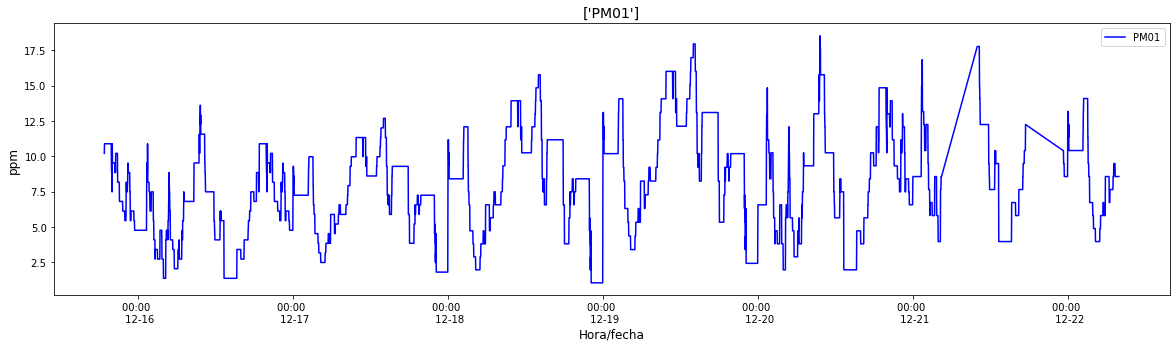

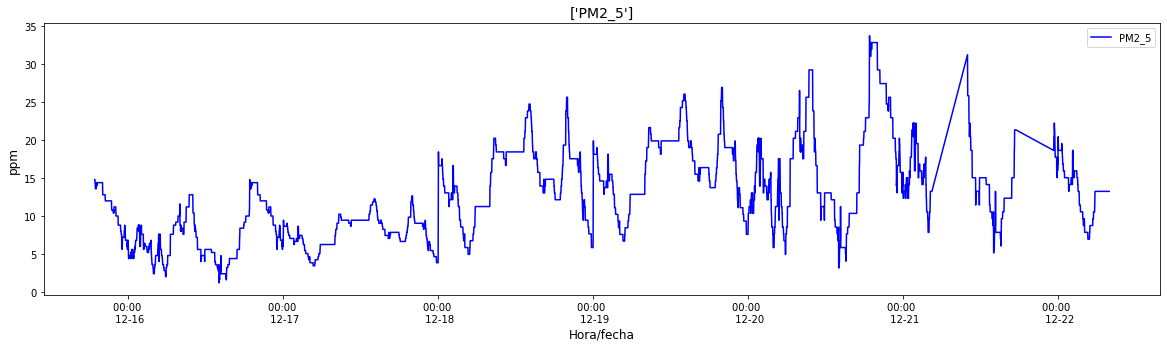

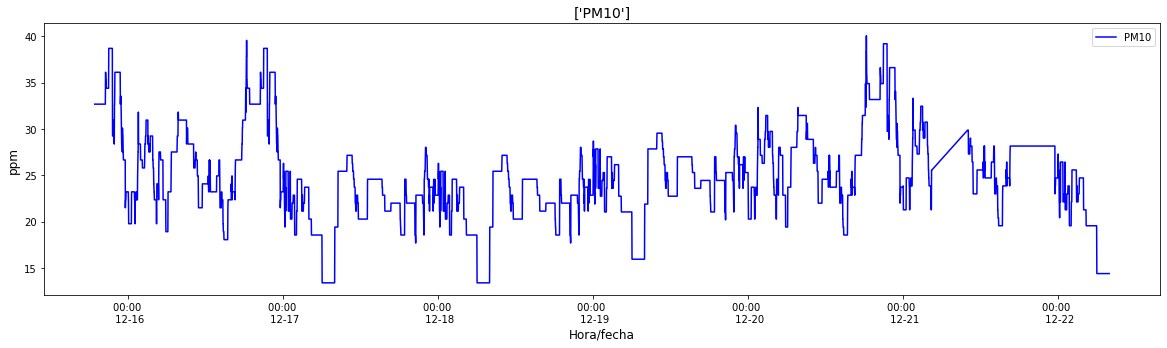

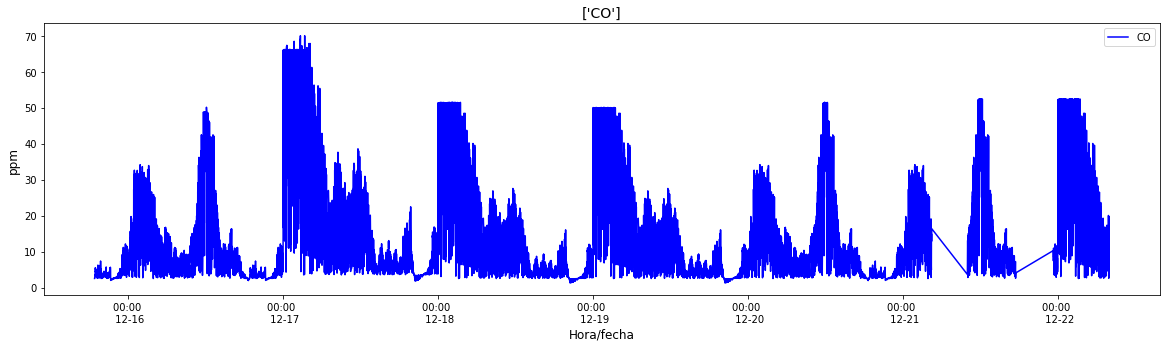

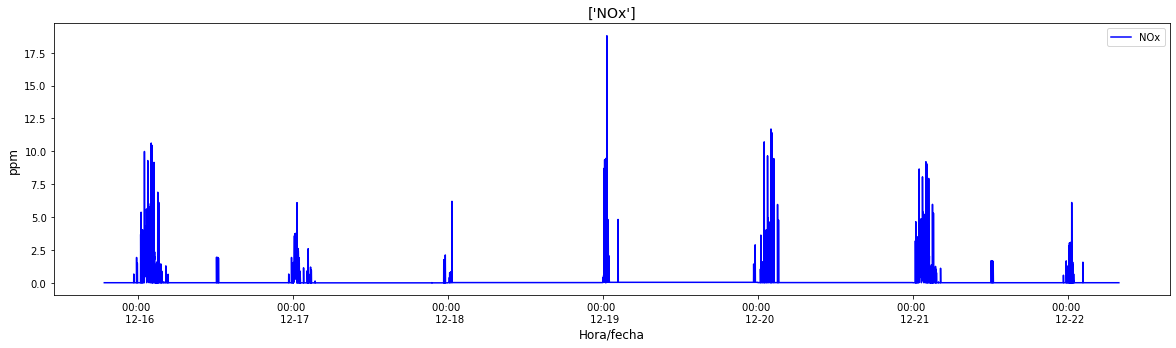

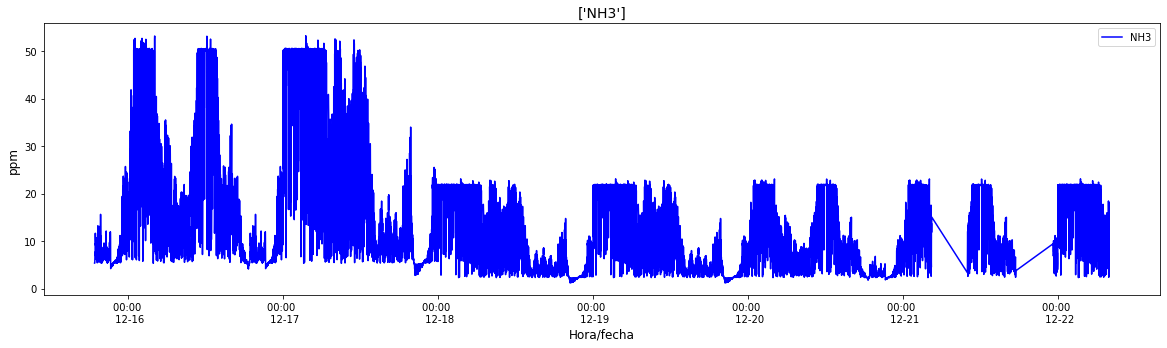

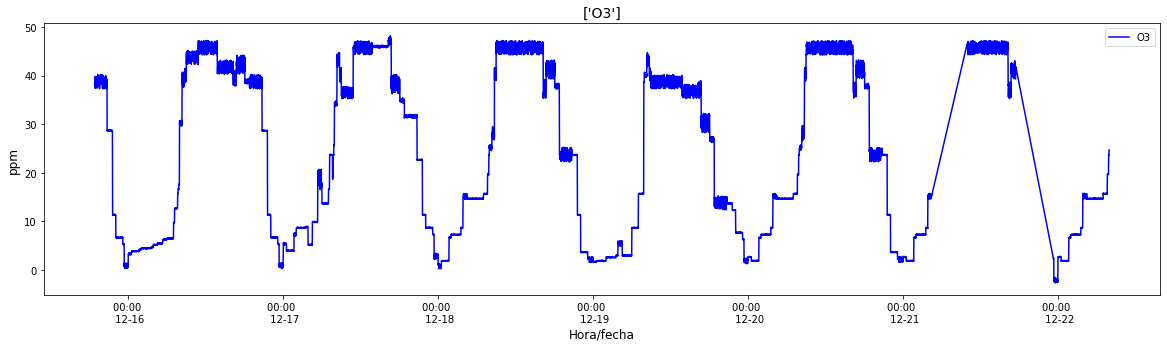

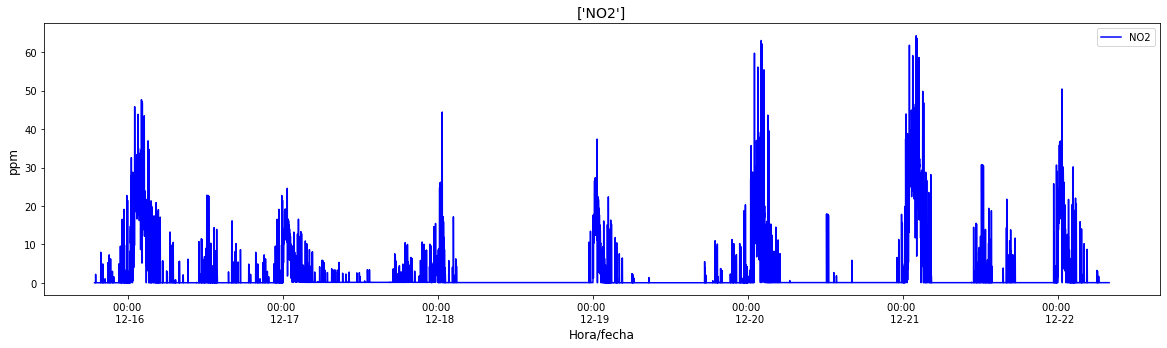

In [245]:
#Datos crudos
for var in df_total.columns:
    gas_plots(data=[df_total], variables=[var], colors=["blue"], labels=[var])

In [19]:
#Procesamiento del profesor 
from pandas.core.window import Window
w = 60  # with window size
S4_new = df_total.rolling(w,center=True).mean()
# removing all the NULL values using dropna() method
S4_new.dropna(inplace=True)

In [20]:
S4_new

,PM01,PM2_5,PM10,CO,NOx,NH3,O3,NO2
datetime,,,,,,,,
2023-12-15 19:17:00,10.868667,14.280000,32.68,3.998000,0.01,8.474500,38.723833,0.208500
2023-12-15 19:18:00,10.880000,14.273333,32.68,4.021667,0.01,8.524667,38.726500,0.208500
2023-12-15 19:19:00,10.880000,14.266667,32.68,4.066167,0.01,8.619167,38.756833,0.208500
2023-12-15 19:20:00,10.880000,14.260000,32.68,4.066000,0.01,8.618833,38.794500,0.208500
2023-12-15 19:21:00,10.880000,14.260000,32.68,4.084000,0.01,8.656500,38.801000,0.208500
2023-12-15 19:22:00,10.880000,14.260000,32.68,4.082667,0.01,8.653667,38.797833,0.208500
2023-12-15 19:23:00,10.857333,14.260000,32.68,4.069333,0.01,8.625167,38.776833,0.208500
2023-12-15 19:24:00,10.834667,14.273333,32.68,4.083333,0.01,8.654667,38.813500,0.208500
2023-12-15 19:25:00,10.800667,14.286667,32.68,4.050333,0.01,8.584667,38.847500,0.208500


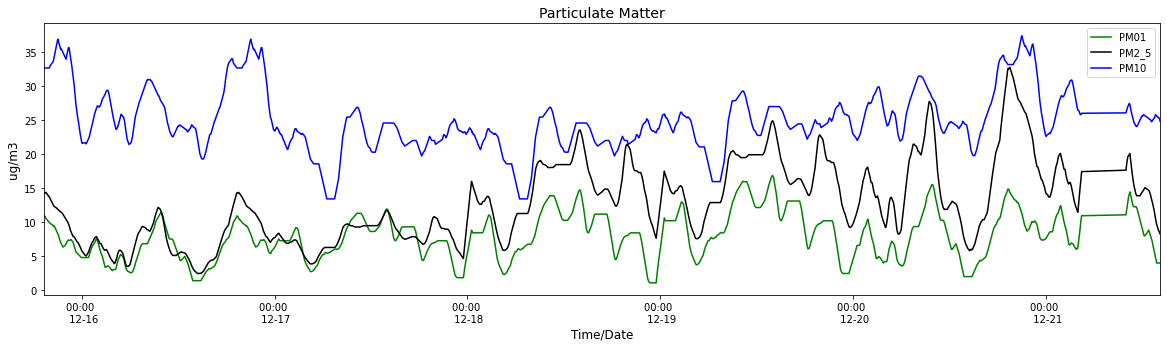

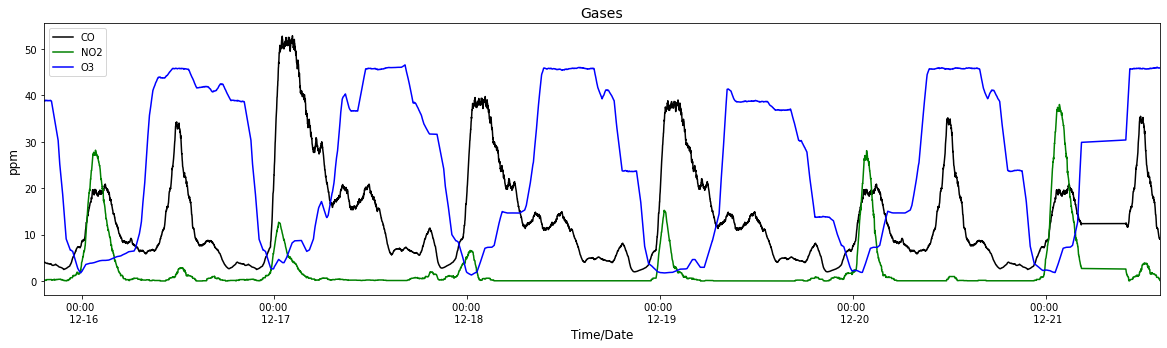

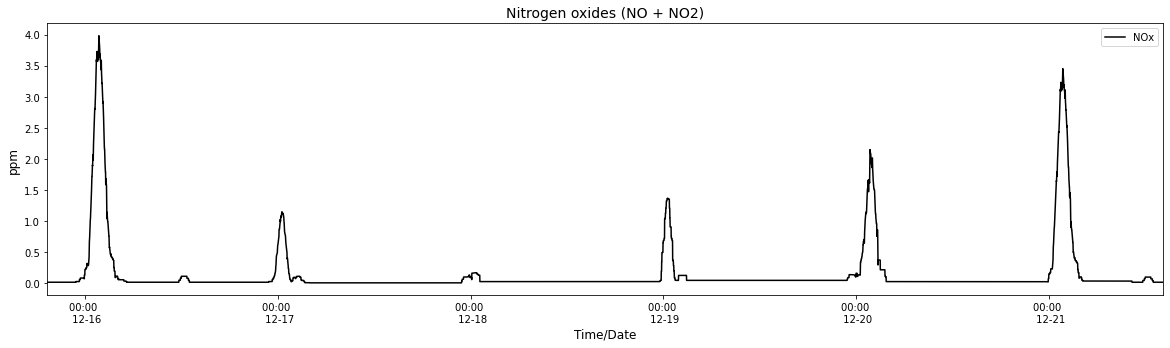

In [298]:
fig1 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax1=fig1.add_subplot(111)
ax1.plot(S4_new.index, S4_new["PM01"], label= "PM01", color="green")
ax1.plot(S4_new.index, S4_new["PM2_5"], label= "PM2_5", color="black")
ax1.plot(S4_new.index, S4_new["PM10"], label= "PM10", color="blue")
ax1.set_xlim([S4_new.index[0],S4_new.index[8000]])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax1.set_ylabel("ug/m3", fontsize=12, color='k')
ax1.set_xlabel("Time/Date", fontsize=12, color='k')
ax1.set_title("Particulate Matter", fontsize=14, color='k')
plt.legend()
plt.show()

fig2 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax2=fig2.add_subplot(111)
ax2.plot(S4_new.index, S4_new["CO"], label= "CO", color="black")
ax2.plot(S4_new.index, S4_new["NO2"], label= "NO2", color="green")
ax2.plot(S4_new.index, S4_new["O3"], label= "O3", color="blue")
ax2.set_xlim([S4_new.index[0],S4_new.index[8000]])
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax2.set_ylabel("ppm", fontsize=12, color='k')
ax2.set_xlabel("Time/Date", fontsize=12, color='k')
ax2.set_title("Gases", fontsize=14, color='k')
plt.legend()
plt.show()

fig3 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax3=fig3.add_subplot(111)
ax3.plot(S4_new.index, S4_new["NOx"], label= "NOx", color="black")
ax3.set_xlim([S4_new.index[0],S4_new.index[8000]])
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax3.set_ylabel("ppm", fontsize=12, color='k')
ax3.set_xlabel("Time/Date", fontsize=12, color='k')
ax3.set_title("Nitrogen oxides (NO + NO2)", fontsize=14, color='k')
plt.legend()
plt.show()

In [52]:
for variable in S4_new.columns:
    minvar=S4_new[variable].values.min()
    maxvar=S4_new[variable].values.max()

    min_x = np.argmin(S4_new[variable])
    min_y = round(minvar,2)
    print("Min:",{variable}, min_x, "-->", min_y, "ppm")

    max_x = np.argmax(S4_new[variable])
    max_y = round(maxvar,2)
    print("Max:",{variable}, max_x, "-->",max_y, "ppm")

Min: {'PM01'} 2023-12-18 22:41:00 --> 1.04 ppm
Max: {'PM01'} 2023-12-19 13:59:00 --> 16.87 ppm
Min: {'PM2_5'} 2023-12-16 14:31:00 --> 2.37 ppm
Max: {'PM2_5'} 2023-12-20 19:31:00 --> 32.78 ppm
Min: {'PM10'} 2023-12-18 06:30:00 --> 13.4 ppm
Max: {'PM10'} 2023-12-20 21:02:00 --> 37.42 ppm
Min: {'CO'} 2023-12-18 20:50:00 --> 2.01 ppm
Max: {'CO'} 2023-12-17 02:14:00 --> 52.8 ppm
Min: {'NOx'} 2023-12-17 03:57:00 --> 0.0 ppm
Max: {'NOx'} 2023-12-16 01:43:00 --> 3.98 ppm
Min: {'NH3'} 2023-12-18 20:50:00 --> 1.85 ppm
Max: {'NH3'} 2023-12-17 01:43:00 --> 46.57 ppm
Min: {'O3'} 2023-12-21 23:47:00 --> -0.36 ppm
Max: {'O3'} 2023-12-17 16:15:00 --> 46.53 ppm
Min: {'NO2'} 2023-12-19 20:30:00 --> 0.04 ppm
Max: {'NO2'} 2023-12-21 01:43:00 --> 38.01 ppm


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


In [47]:
def calculate_column_means(dataframe):
    # dataframe.drop("Fecha", axis=1, inplace=True)
    dataframe.dropna(inplace=True)
    column_means = dataframe.mean(axis=0)
    result_dict = column_means.to_dict()
    
    return result_dict

def calculate_aqi(concentration, pollutant_name, pollutant_ranges):

    # Select the appropriate concentration range for the pollutant
    ranges = pollutant_ranges.get(pollutant_name, [])
    if not ranges:
        raise ValueError(f"Invalid pollutant name: {pollutant_name}")

    # Determine the AQI category based on the concentration
    for i, (low, high) in enumerate(ranges):
        if low <= concentration <= high:
            index_low, index_high = i * 50, (i + 1) * 50
            break
    else:
        raise ValueError(f"Concentration value ({concentration}) outside the defined range.")
    
    aqi = ((index_high - index_low) / (high - low)) * (concentration - low) + index_low

    return aqi

def overall_aqi(co_concentration, no2_concentration, o3_concentration, pm25_concentration, pm10_concentration):

    concentrations=[co_concentration, no2_concentration, o3_concentration, pm25_concentration, pm10_concentration]

    # Calculate individual AQI values for each gas
    for concentration in concentrations:
        if concentration == np.nan:
            concentration = 0
        else:
            concentration=concentration
    
    aqi_co = calculate_aqi(co_concentration, 'CO')
    aqi_no2 = calculate_aqi(no2_concentration, 'NO2')
    aqi_o3 = calculate_aqi(o3_concentration, 'O3')
    aqi_pm25 = calculate_aqi(pm25_concentration, 'PM2_5')
    aqi_pm10 = calculate_aqi(pm10_concentration, 'PM10')

    # Determine overall AQI by taking the maximum of individual AQI values
    overall_aqi_value = max(aqi_co, aqi_no2, aqi_o3, aqi_pm25, aqi_pm10)
    return overall_aqi_value

def aqi_color(aqi):
    color_categories = {
        (0, 50): ('Good', 'lightgreen'),
        (51, 100): ('Moderate', 'yellow'),
        (101, 150): ('Unhealthy for Sensitive Groups', 'orange'),
        (151, 200): ('Unhealthy', 'red'),
        (201, 300): ('Very Unhealthy', 'purple'),
        (301, float('inf')): ('Hazardous', 'darkpurple')
    }

    for (low, high), (title, color) in color_categories.items():
        if low <= aqi <= high:
            return color, title

In [36]:
df_siata = pd.read_csv("D:\Laura_Rojas_Gonzalez\JI_4DAir\Girardota\Datos_SIATA\\pm25_pm10_dic.csv")

In [37]:
df_siata["Date"] = df_siata["Unnamed: 0"]+" "+df_siata["Unnamed: 1"]
df_siata.dropna(axis=0, inplace=True)
df_siata.drop("Unnamed: 0", axis=1, inplace=True)
df_siata.drop("Unnamed: 1", axis=1, inplace=True)
df_siata.reset_index(drop=True, inplace=True)

In [41]:
df_siata_new.head()

,PM25,PM10
Date,,
2023-12-15 19:00:00,17.0,66.0
2023-12-15 20:00:00,18.0,29.0
2023-12-15 21:00:00,19.0,53.0
2023-12-15 22:00:00,24.0,62.0
2023-12-15 23:00:00,23.0,76.0


In [38]:
df_siata["Date"] = pd.to_datetime(df_siata["Date"])

In [39]:
df_siata.set_index("Date", drop=True, inplace=True)

In [40]:
df_siata_new = df_siata["2023-12-15 19:00:00":"2023-12-22 8:00:00"]

In [42]:
df_siata_new.rename(columns={"PM25": "PM2_5"}, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [232]:
# Find columns with NaN values, their counts, and indices
nan_info = pd.DataFrame({
#     'Column': df_siata_new.columns,
    'NaN Count': df_siata_new.isna().sum(),
    'Indices with NaN': [df_siata_new.index[df_siata_new[col].isna()].tolist() for col in df_siata_new.columns]
})

# Filter out columns with NaN values
columns_with_nan = nan_info[nan_info['NaN Count'] > 0]

# Display the result
print("Columns with NaN values, their counts, and indices:")
print(columns_with_nan)

Columns with NaN values, their counts, and indices:
Empty DataFrame
Columns: [NaN Count, Indices with NaN]
Index: []


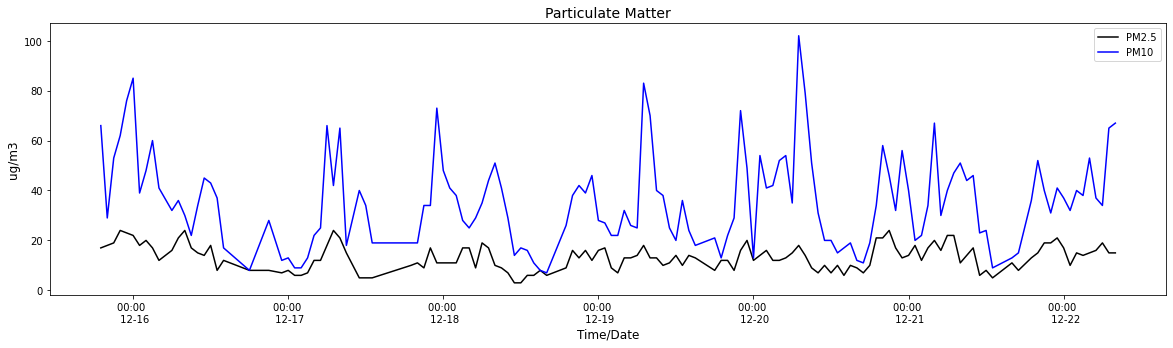

In [299]:
fig4 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax4=fig4.add_subplot(111)
ax4.plot(df_siata_new.index, df_siata_new["PM2_5"], label= "PM2.5", color="black")
ax4.plot(df_siata_new.index, df_siata_new["PM10"], label= "PM10", color="blue")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax4.set_ylabel("ug/m3", fontsize=12, color='k')
ax4.set_xlabel("Time/Date", fontsize=12, color='k')
ax4.set_title("Particulate Matter", fontsize=14, color='k')
plt.legend()
plt.show()

In [22]:
df_siata2 = pd.read_csv("D:\\Laura_Rojas_Gonzalez\\JI_4DAir\\Girardota\\Datos_SIATA\\gases_dic.csv")

In [25]:
df_siata2.head()

,Ozono,NO,NO2,NOx,SO2,Date
0,3.6,2.5,3.8,6.4,2.018,2023-12-01 00:00:00
1,3.7,2.5,3.1,5.6,1.889,2023-12-01 00:01:00
2,5.7,2.2,2.3,4.5,1.864,2023-12-01 00:02:00
3,5.1,1.4,1.5,2.9,1.718,2023-12-01 00:03:00
4,5.8,0.9,0.5,1.4,1.456,2023-12-01 00:04:00


In [23]:
df_siata2["Date"] = df_siata2["Unnamed: 0"]+" "+df_siata2["Unnamed: 1"]
# df_siata2.dropna(axis=0, inplace=True)
df_siata2.drop("Unnamed: 0", axis=1, inplace=True)
df_siata2.drop("Unnamed: 1", axis=1, inplace=True)
df_siata2.reset_index(drop=True, inplace=True)

In [24]:
df_siata2["Date"] = pd.to_datetime(df_siata2["Date"])

In [26]:
df_siata2.set_index("Date", drop=True, inplace=True)

In [27]:
df_siata2.rename(columns={"Ozono": "O3"}, inplace=True)

In [28]:
df_siata2_new = df_siata2["2023-12-15 19:00:00":"2023-12-22 8:00:00"]

In [43]:
df_siata2_new.head()

,O3,NO,NO2,NOx,SO2
Date,,,,,
2023-12-15 19:00:00,11.8,NaN,NaN,NaN,2.088
2023-12-15 19:01:00,10.6,0.5,10.9,11.4,2.121
2023-12-15 19:02:00,9.9,0.6,11.1,11.6,2.115
2023-12-15 19:03:00,10.3,0.6,11.1,11.7,2.086
2023-12-15 19:04:00,10.7,0.6,11.1,11.7,2.195


In [459]:
# Find columns with NaN values, their counts, and indices
nan_info = pd.DataFrame({
#     'Column': df_siata_new.columns,
    'NaN Count': df_siata2_new.isna().sum(),
    'Indices with NaN': [df_siata2_new.index[df_siata2_new[col].isna()].tolist() for col in df_siata2_new.columns]
})

# Filter out columns with NaN values
columns_with_nan = nan_info[nan_info['NaN Count'] > 0]

# Display the result
print("Columns with NaN values, their counts, and indices:")
print(columns_with_nan)

Columns with NaN values, their counts, and indices:
     NaN Count                                   Indices with NaN
O3         872  [2023-12-15 21:49:00, 2023-12-16 00:50:00, 202...
NO        3416  [2023-12-15 19:00:00, 2023-12-15 19:10:00, 202...
NO2       2663  [2023-12-15 19:00:00, 2023-12-15 19:10:00, 202...
NOx       2764  [2023-12-15 19:00:00, 2023-12-15 19:10:00, 202...
SO2        949  [2023-12-15 19:52:00, 2023-12-15 19:55:00, 202...


In [44]:
#Procesamiento del profesor 
from pandas.core.window import Window
w = 60  # with window size
df_siata2_corr = df_siata2.rolling(w,center=True).mean()
# removing all the NULL values using dropna() method
# df_S4_user.dropna(inplace=True)

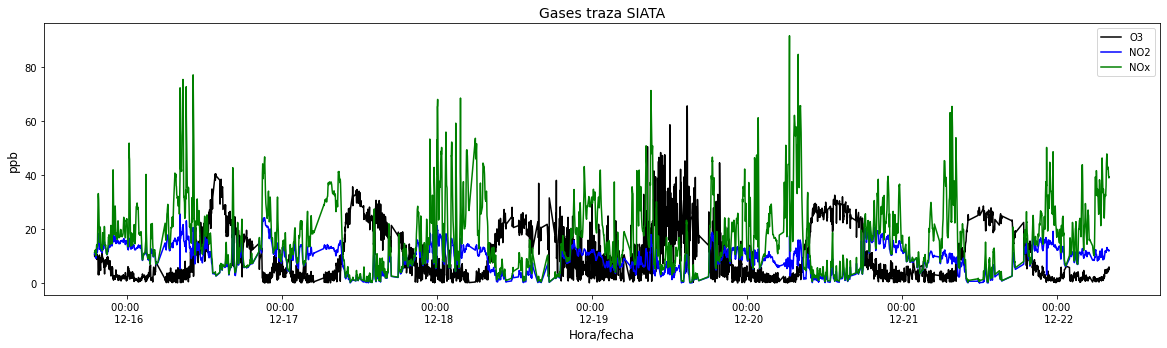

In [265]:
fig5 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax5=fig5.add_subplot(111)
ax5.plot(df_siata2_new.index, df_siata2_new["O3"], label= "O3", color="black")
ax5.plot(df_siata2_new.index, df_siata2_new["NO2"], label= "NO2", color="blue")
ax5.plot(df_siata2_new.index, df_siata2_new["NOx"], label= "NOx", color="green")
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax5.set_ylabel("ppb", fontsize=12, color='k')
ax5.set_xlabel("Hora/fecha", fontsize=12, color='k')
ax5.set_title("Gases traza SIATA", fontsize=14, color='k')
plt.legend()
plt.show()

In [321]:
# Define concentration ranges and corresponding AQI breakpoints for each pollutant
pollutant_ranges = {
    'CO': [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 40.4), (40.5, 50.4)],
    'NO2': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650, 2049)],
    'O3': [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 404), (405, 504)],
    'PM2_5': [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500.4)],
    'PM10': [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)]
}
# PM (ug/m3), gases (ppm)
columns = calculate_column_means(df_total)
print(columns["PM2_5"], columns["PM10"])
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

12.73257832151863 24.681139949690486
ICA PM2_5 51.36 ('yellow', 'Moderate')
ICA PM10 22.85 ('lightgreen', 'Good')
ICA CO 177.33 ('red', 'Unhealthy')
ICA O3 22.62 ('lightgreen', 'Good')
ICA NO2 2.25 ('lightgreen', 'Good')


In [322]:
pollutant_ranges = {
    'CO': [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 40.4), (40.5, 50.4)],
    'NO2': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650, 2049)],
    'O3': [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 404), (405, 504)],
    'PM2_5': [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500.4)],
    'PM10': [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)]
}
columns = calculate_column_means(df_siata_new)
print(columns["PM2_5"], columns["PM10"])
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)
columns2 = calculate_column_means(df_siata2_new)
for variable in columns2:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns2[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


13.246376811594203 35.60144927536232
ICA PM2_5 52.46 ('yellow', 'Moderate')
ICA PM10 32.96 ('lightgreen', 'Good')
ICA O3 9.34 ('lightgreen', 'Good')
ICA NO2 8.85 ('lightgreen', 'Good')


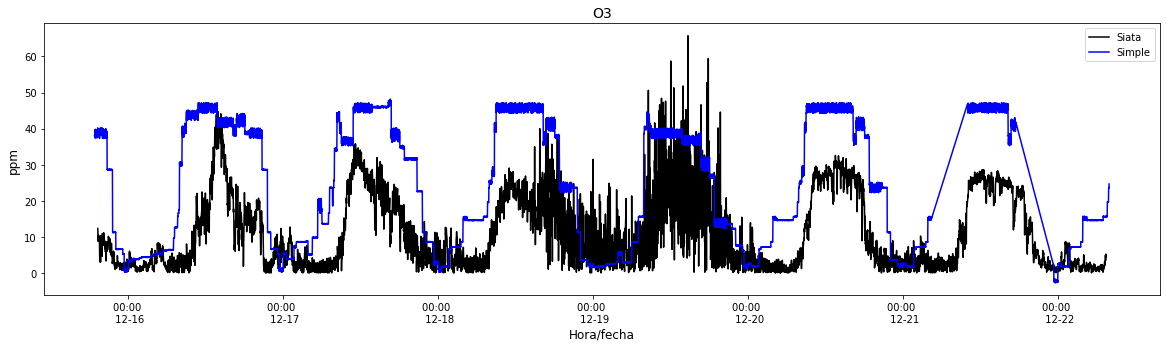

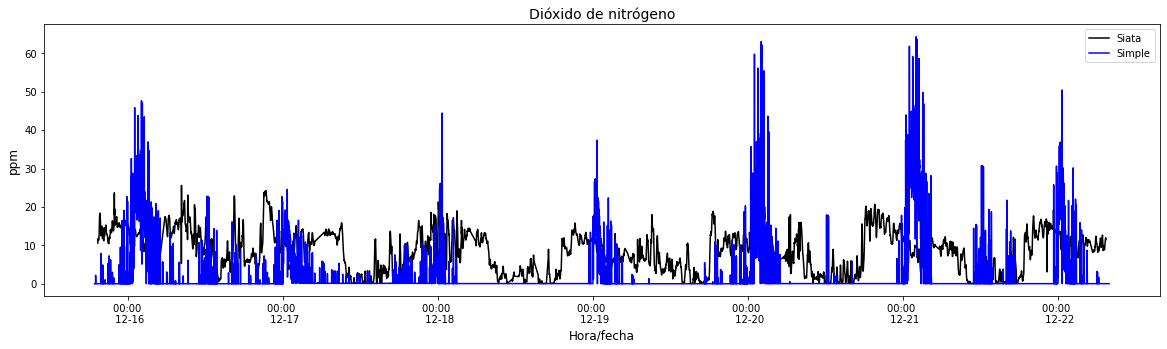

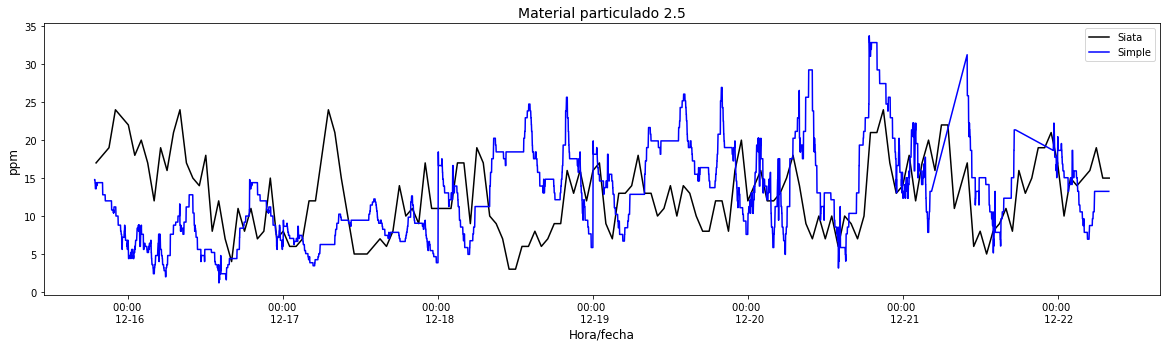

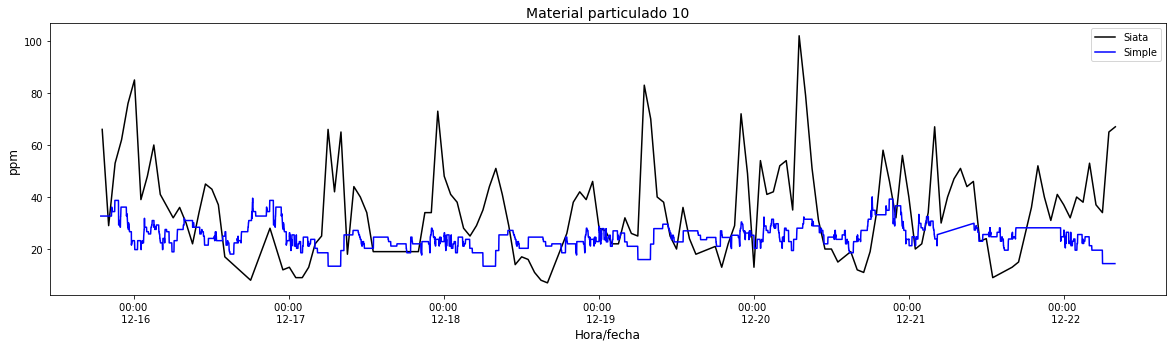

In [107]:
fig7 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax7=fig7.add_subplot(111)
ax7.plot(df_siata2_new.index, df_siata2_new["O3"], label= "Siata", color="black")
ax7.plot(df_total.index, df_total["O3"], label= "Simple", color="blue")
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax7.set_ylabel("ppm", fontsize=12, color='k')
ax7.set_xlabel("Hora/fecha", fontsize=12, color='k')
ax7.set_title("O3", fontsize=14, color='k')
plt.legend()
plt.show()

fig8 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax8=fig8.add_subplot(111)
ax8.plot(df_siata2_new.index, df_siata2_new["NO2"], label= "Siata", color="black")
ax8.plot(df_total.index, df_total["NO2"], label= "Simple", color="blue")
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax8.set_ylabel("ppm", fontsize=12, color='k')
ax8.set_xlabel("Hora/fecha", fontsize=12, color='k')
ax8.set_title("Dióxido de nitrógeno", fontsize=14, color='k')
plt.legend()
plt.show()

fig9 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax9=fig9.add_subplot(111)
ax9.plot(df_siata_new.index, df_siata_new["PM2_5"], label= "Siata", color="black")
ax9.plot(df_total.index, df_total["PM2_5"], label= "Simple", color="blue")
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax9.set_ylabel("ppm", fontsize=12, color='k')
ax9.set_xlabel("Hora/fecha", fontsize=12, color='k')
ax9.set_title("Material particulado 2.5", fontsize=14, color='k')
plt.legend()
plt.show()

fig0 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax0=fig0.add_subplot(111)
ax0.plot(df_siata_new.index, df_siata_new["PM10"], label= "Siata", color="black")
ax0.plot(df_total.index, df_total["PM10"], label= "Simple", color="blue")
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax0.set_ylabel("ppm", fontsize=12, color='k')
ax0.set_xlabel("Hora/fecha", fontsize=12, color='k')
ax0.set_title("Material particulado 10", fontsize=14, color='k')
plt.legend()
plt.show()

In [45]:
df_siata2_h = df_siata2_new.resample('H').mean()
df_simple_h = S4_new.resample('H').mean()
# df_siata_h = df_siata_h["2023-12-15 19:00:00":"2023-12-22 07:00:00"]
df_simple_h.dropna(axis=0, inplace=True)

In [46]:
df_simple_h.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [47]:
df_simple_h.head()

,PM01,PM2_5,PM10,CO,NOx,NH3,O3,NO2
datetime,,,,,,,,
2023-12-15 19:00:00,10.407690,14.105581,32.684000,3.878798,0.010000,8.222360,38.842547,0.270880
2023-12-15 20:00:00,9.282189,12.557667,34.367033,3.523606,0.010000,7.471364,35.807625,0.315308
2023-12-15 21:00:00,6.962822,11.278222,35.370844,2.864881,0.010000,6.074433,21.150342,0.286775
2023-12-15 22:00:00,7.172300,9.136667,34.002728,3.607644,0.011467,7.648836,7.438483,0.501889
2023-12-15 23:00:00,5.418656,6.935000,25.590256,6.944908,0.062922,14.723011,3.233714,1.741803


In [48]:
df_siata_total = pd.merge(df_siata_new, df_siata2_h, left_index=True, right_index=True)

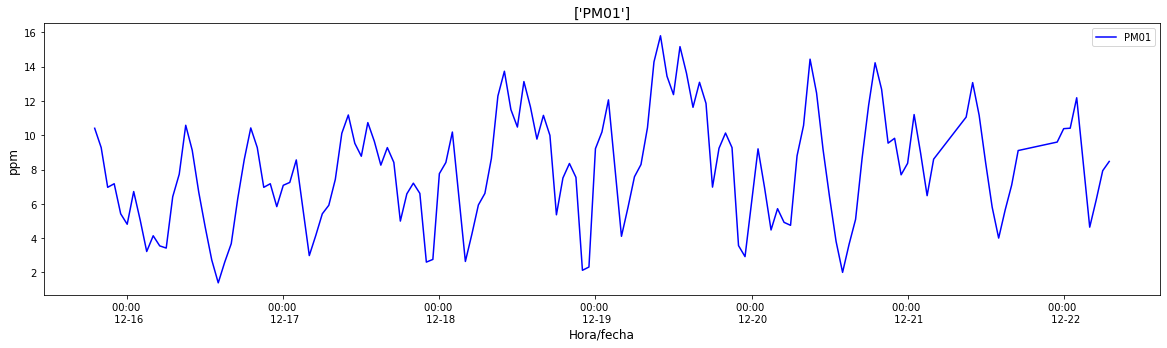

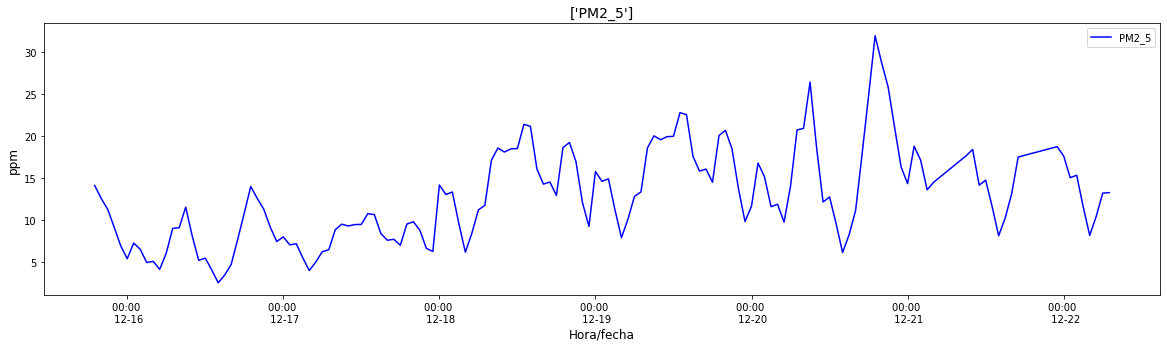

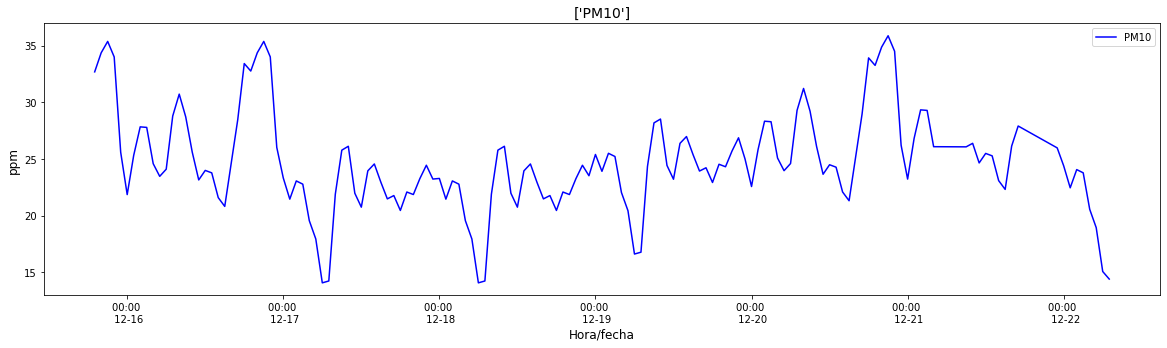

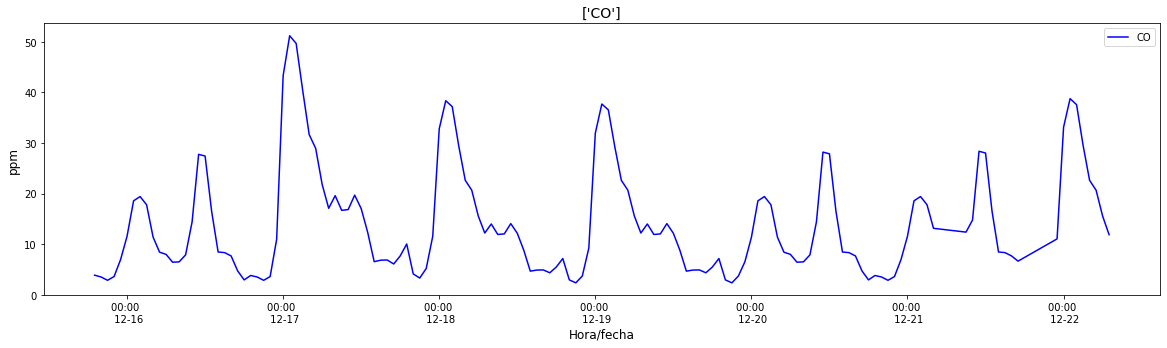

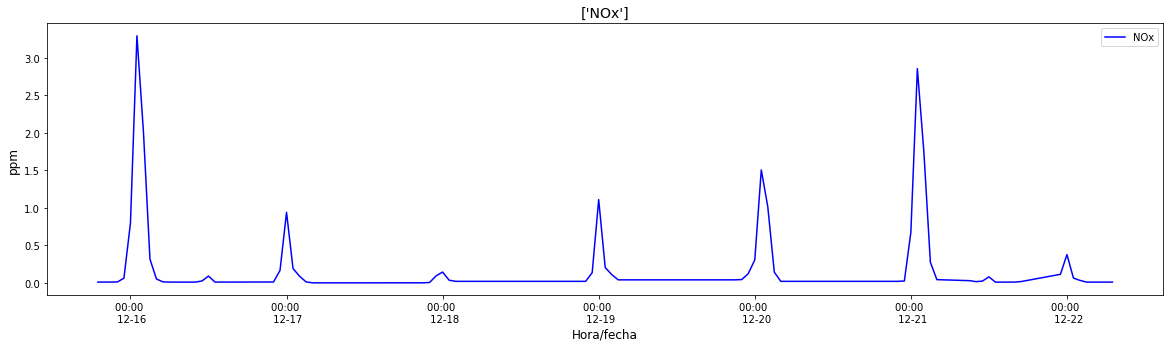

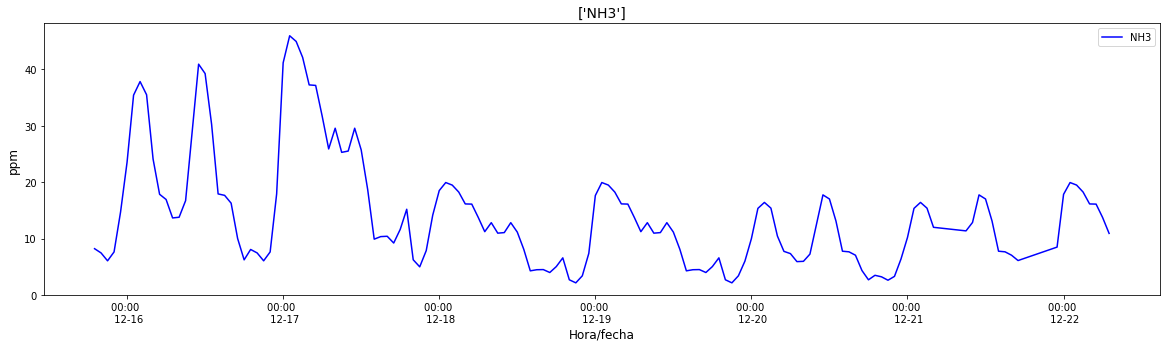

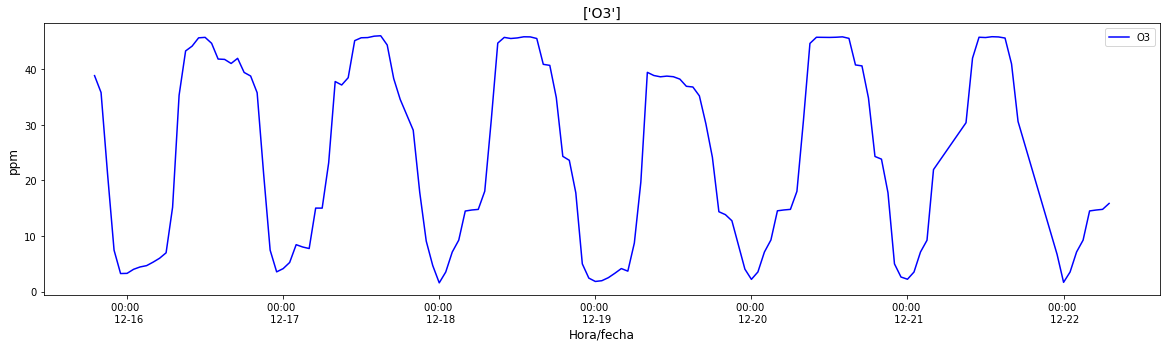

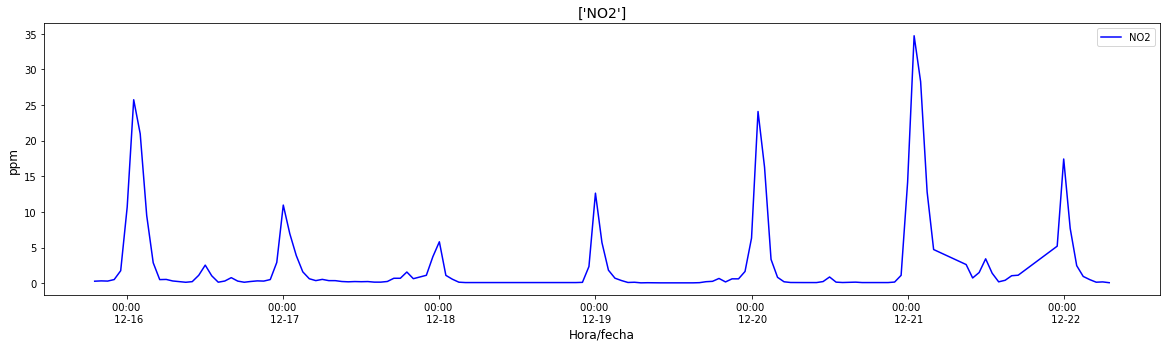

In [283]:
#Datos interpolados: frequencia horaria
for var in df_simple_h.columns:
    gas_plots(data=[df_simple_h], variables=[var], colors="blue", labels=[var])

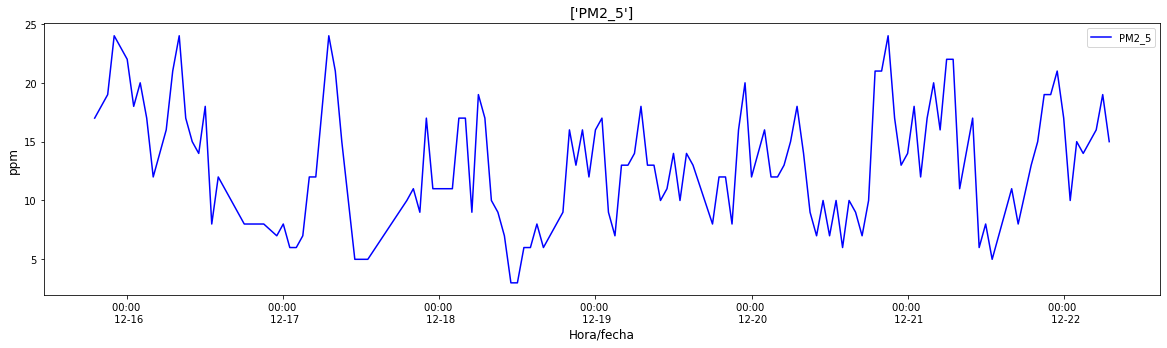

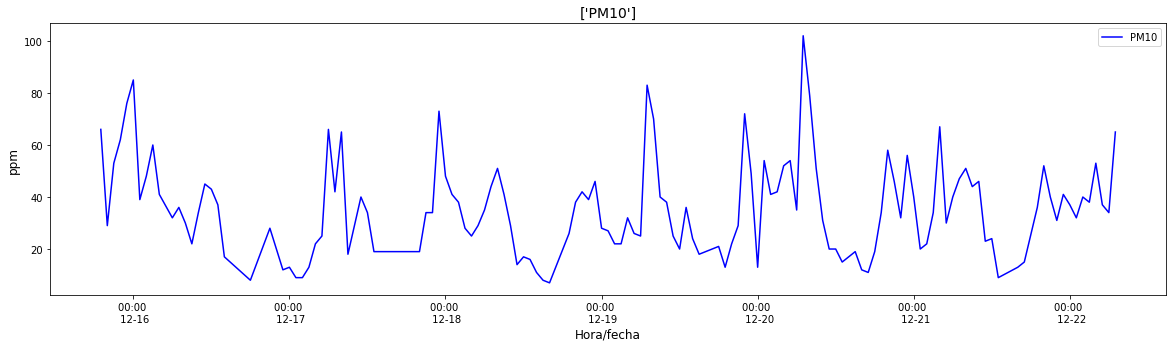

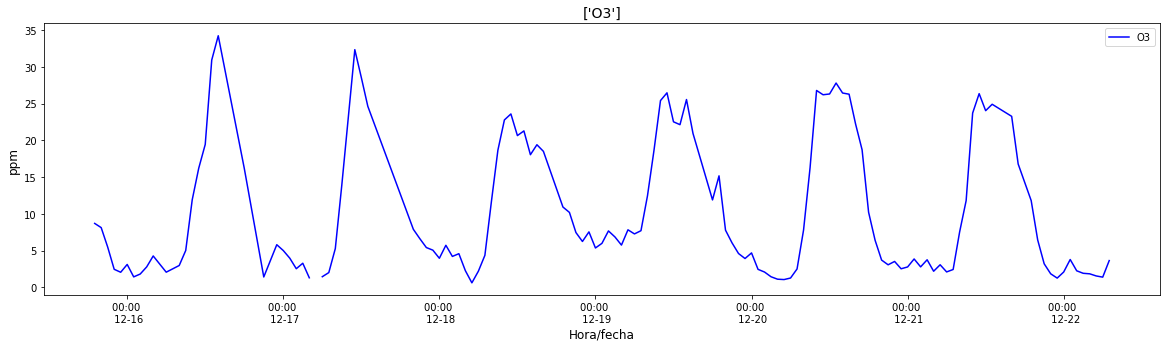

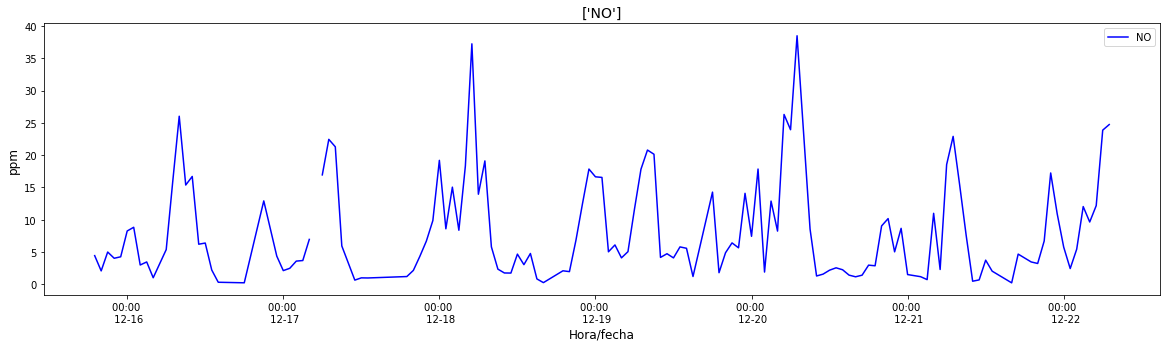

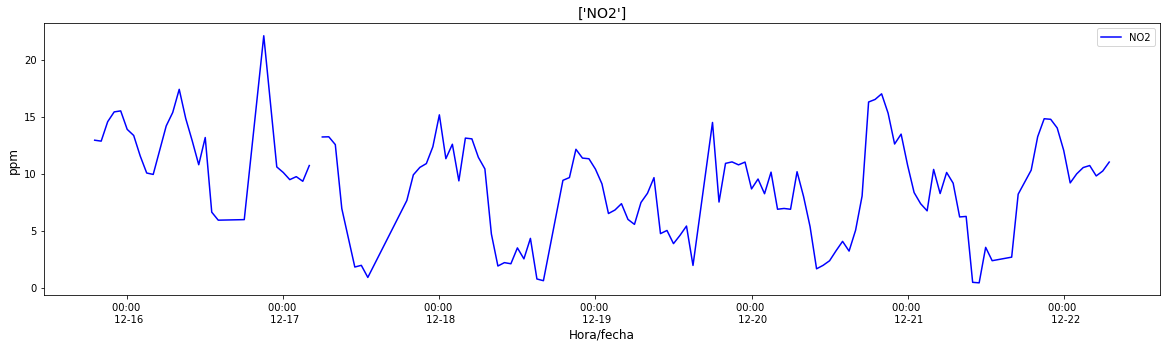

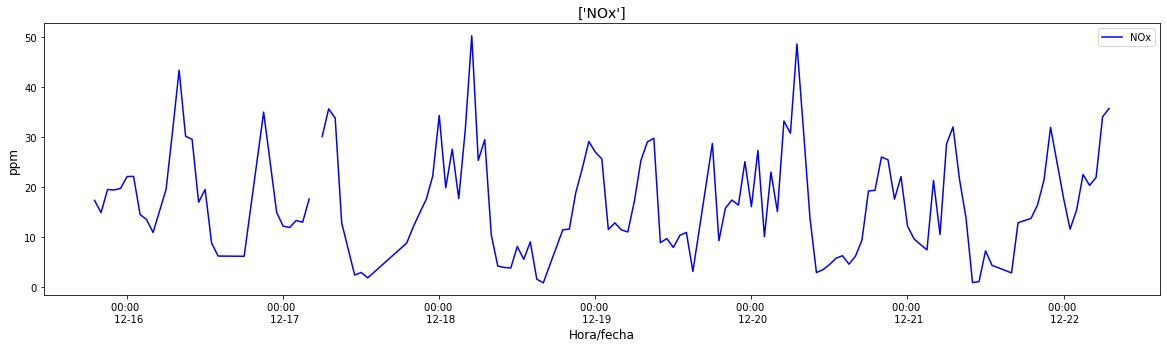

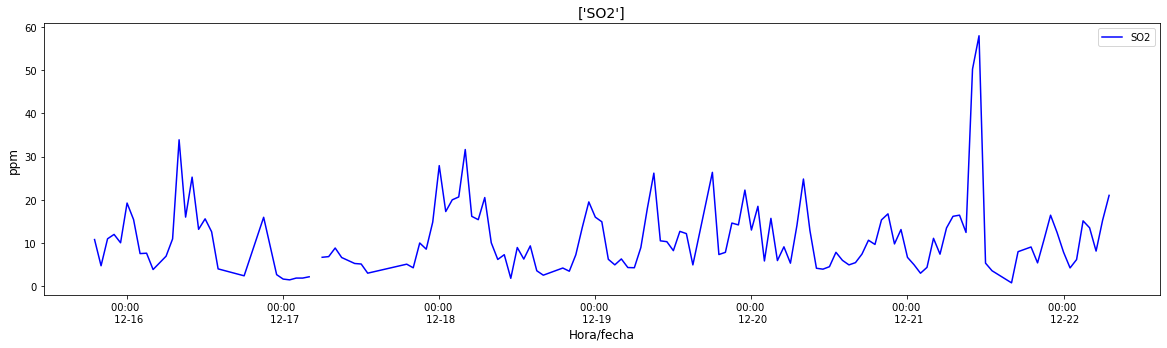

In [300]:
#Datos interpolados: frequencia horaria
for var in df_siata_total.columns:
    gas_plots(data=[df_siata_total], variables=[var], colors="blue", labels=[var])

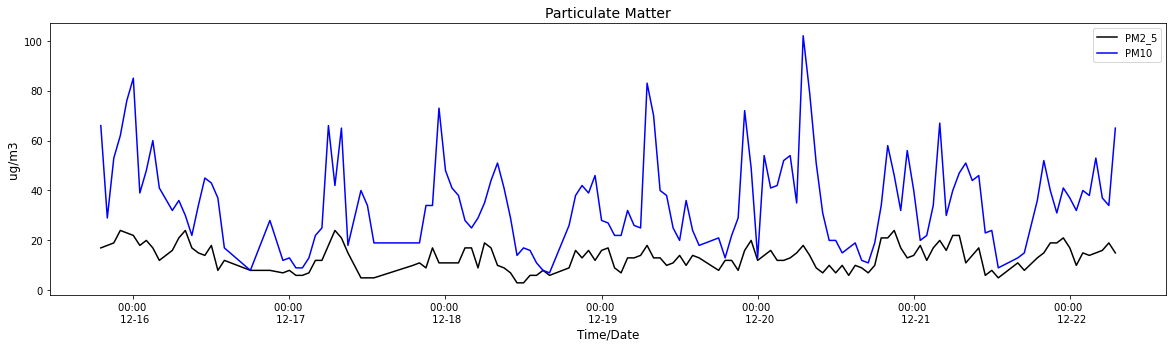

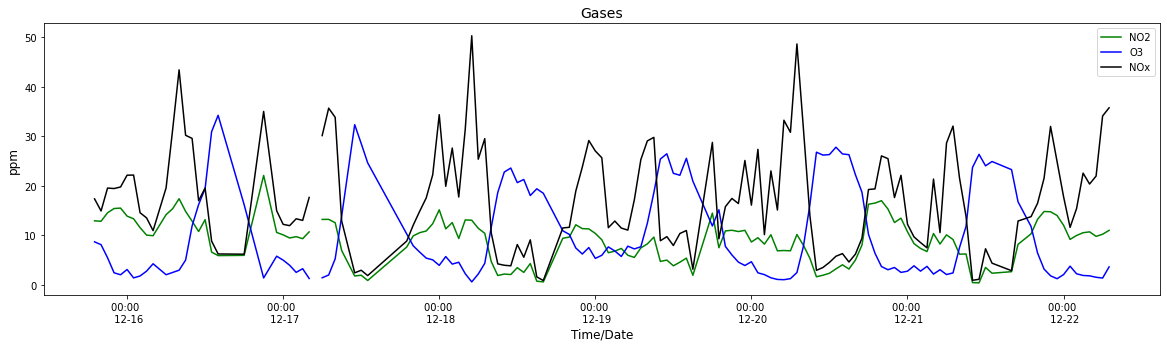

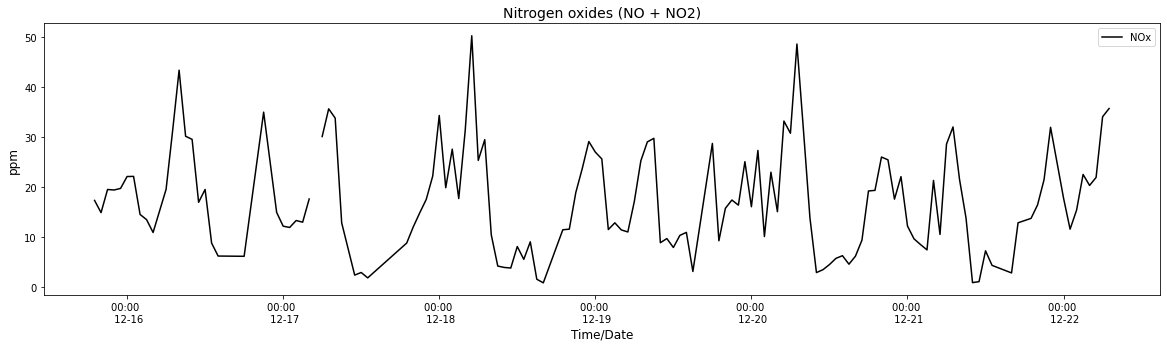

In [309]:
fig1 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax1=fig1.add_subplot(111)
# ax1.plot(df_siata_total.index, df_siata_total["PM01"], label= "PM01", color="green")
ax1.plot(df_siata_total.index, df_siata_total["PM2_5"], label= "PM2_5", color="black")
ax1.plot(df_siata_total.index, df_siata_total["PM10"], label= "PM10", color="blue")
# ax1.set_xlim([df_siata_total.index[0],df_siata_total.index[8000]])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax1.set_ylabel("ug/m3", fontsize=12, color='k')
ax1.set_xlabel("Time/Date", fontsize=12, color='k')
ax1.set_title("Particulate Matter", fontsize=14, color='k')
plt.legend()
plt.show()

fig2 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax2=fig2.add_subplot(111)
# ax2.plot(df_siata_total.index, df_siata_total["SO2"], label= "SO2", color="black")
ax2.plot(df_siata_total.index, df_siata_total["NO2"], label= "NO2", color="green")
ax2.plot(df_siata_total.index, df_siata_total["O3"], label= "O3", color="blue")
ax2.plot(df_siata_total.index, df_siata_total["NOx"], label= "NOx", color="black")
# ax2.set_xlim([df_siata_total.index[0],df_siata_total.index[8000]])
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax2.set_ylabel("ppm", fontsize=12, color='k')
ax2.set_xlabel("Time/Date", fontsize=12, color='k')
ax2.set_title("Gases", fontsize=14, color='k')
plt.legend()
plt.show()

fig3 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])
ax3=fig3.add_subplot(111)
ax3.plot(df_siata_total.index, df_siata_total["NOx"], label= "NOx", color="black")
# ax3.set_xlim([df_siata_total.index[0],df_siata_total.index[8000]])
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax3.set_ylabel("ppm", fontsize=12, color='k')
ax3.set_xlabel("Time/Date", fontsize=12, color='k')
ax3.set_title("Nitrogen oxides (NO + NO2)", fontsize=14, color='k')
plt.legend()
plt.show()

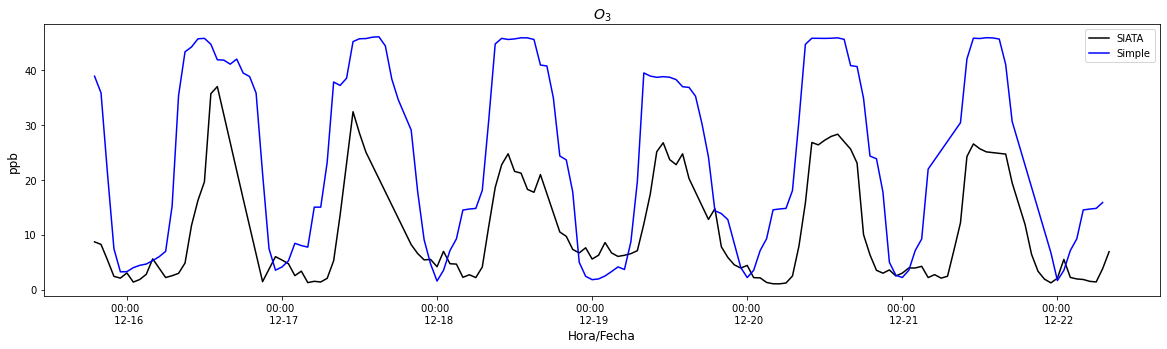

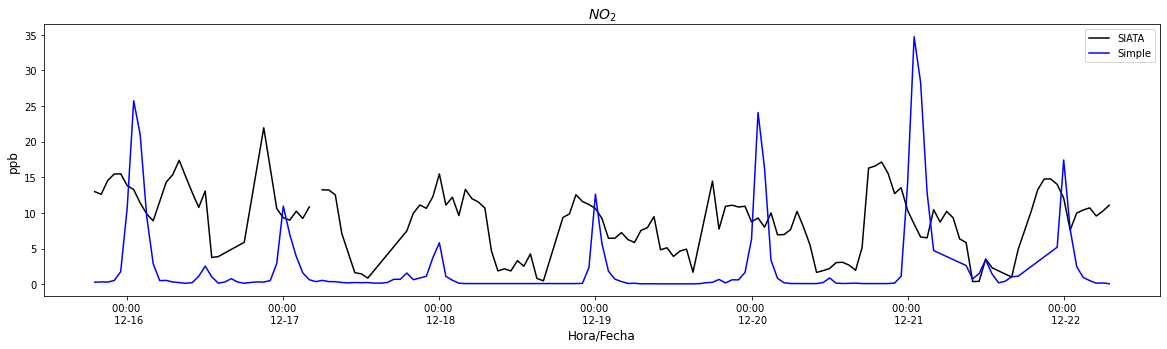

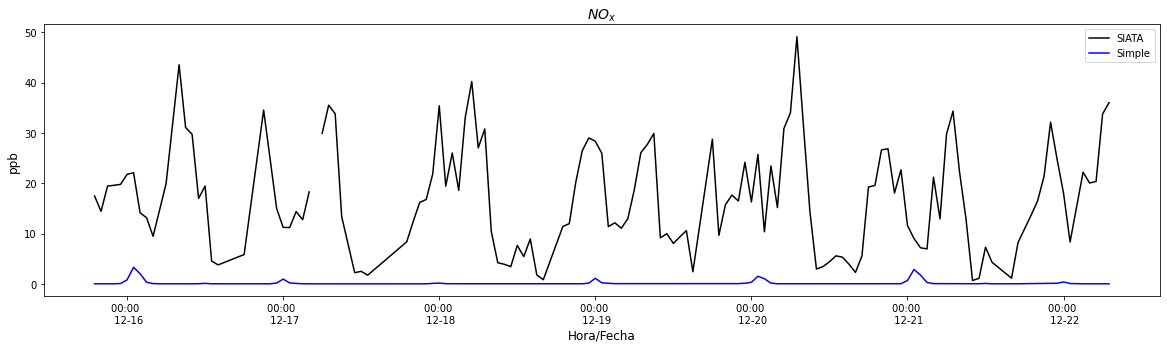

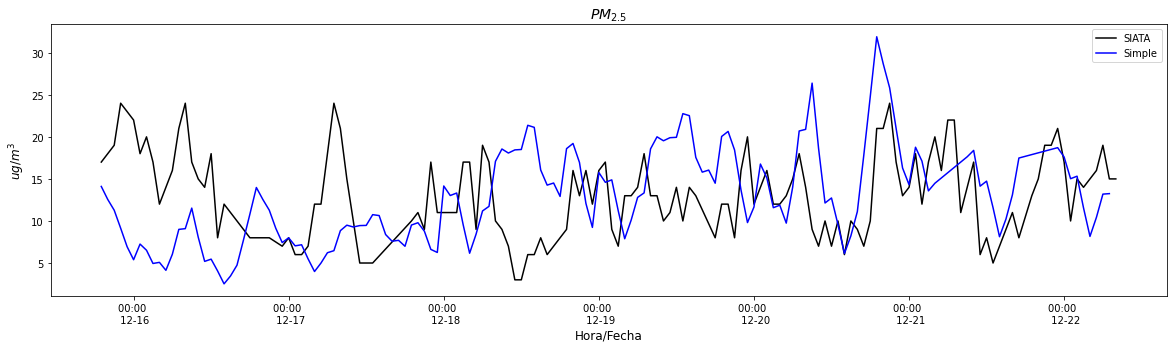

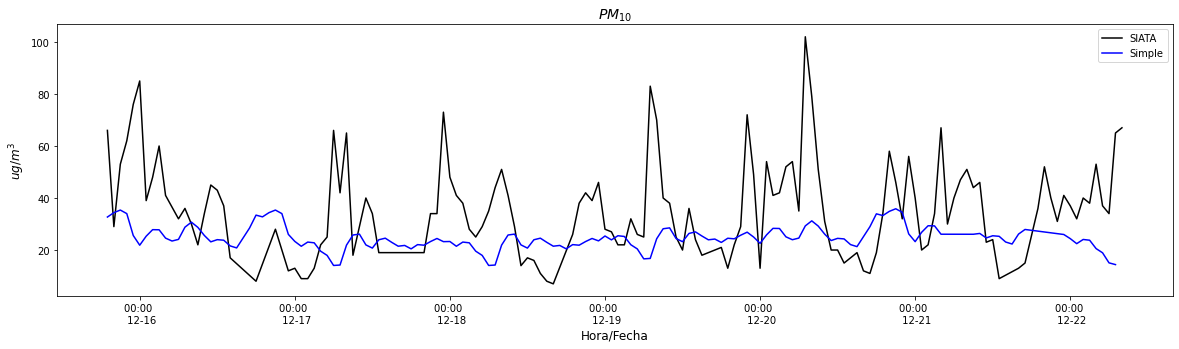

In [61]:
#Datos interpolados, sin corregir Simple

fig7 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax7=fig7.add_subplot(111)
ax7.plot(df_siata_total.index, df_siata_total["O3"], label= "SIATA", color="black")
ax7.plot(df_simple_h.index, df_simple_h["O3"], label= "Simple", color="blue")
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax7.set_ylabel("ppb", fontsize=12, color='k')
ax7.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax7.set_title(r"$O_3$", fontsize=14, color='k')
plt.legend()
plt.show()

fig11 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax11=fig11.add_subplot(111)
ax11.plot(df_siata_total.index, df_siata_total["NO2"], label= "SIATA", color="black")
ax11.plot(df_simple_h.index, df_simple_h["NO2"], label= "Simple", color="blue")
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax11.set_ylabel("ppb", fontsize=12, color='k')
ax11.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax11.set_title(r"$NO_2$", fontsize=14, color='k')
plt.legend()
plt.show()

fig11 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax11=fig11.add_subplot(111)
ax11.plot(df_siata_total.index, df_siata_total["NOx"], label= "SIATA", color="black")
ax11.plot(df_simple_h.index, df_simple_h["NOx"], label= "Simple", color="blue")
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax11.set_ylabel("ppb", fontsize=12, color='k')
ax11.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax11.set_title(r"$NO_x$", fontsize=14, color='k')
plt.legend()
plt.show()

fig9 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax9=fig9.add_subplot(111)
ax9.plot(df_siata_total.index, df_siata_total["PM2_5"], label= "SIATA", color="black")
ax9.plot(df_simple_h.index, df_simple_h["PM2_5"], label= "Simple", color="blue")
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax9.set_ylabel(r"$ug/m^3$", fontsize=12, color='k')
ax9.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax9.set_title(r"$PM_{2.5}$", fontsize=14, color='k')
plt.legend()
plt.show()

fig0 = plt.figure(figsize=(20,5))
shape_figs = (1,1)
ax0=fig0.add_subplot(111)
ax0.plot(df_siata_total.index, df_siata_total["PM10"], label= "SIATA", color="black")
ax0.plot(df_simple_h.index, df_simple_h["PM10"], label= "Simple", color="blue")
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax0.set_ylabel(r"$ug/m^3$", fontsize=12, color='k')
ax0.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax0.set_title(r"$PM_{10}$", fontsize=14, color='k')
plt.legend()
plt.show()

In [347]:
print("Simple")
for var in df_simple_h.columns:
    print(var)
    simple_min = np.min(df_simple_h[var])
    simple_argmin = np.argmin(df_simple_h[var])
    simple_max = np.max(df_simple_h[var])
    simple_argmax = np.argmax(df_simple_h[var])
    simple_avg = np.mean(df_simple_h[var])
    print("Min", round(simple_min,2), simple_argmin)
    print("Max", round(simple_max,2), simple_argmax)
    print("Avg", round(simple_avg,2))
    
print("SIATA")
for var in df_siata_total.columns:
    print(var)
    siata_min = np.min(df_siata_total[var])
    siata_argmin = np.argmin(df_siata_total[var])
    siata_max = np.max(df_siata_total[var])
    siata_argmax = np.argmax(df_siata_total[var])
    siata_avg = np.mean(df_siata_total[var])
    print("Min", round(siata_min,2), siata_argmin)
    print("Max", round(siata_max,2), siata_argmax)
    print("Avg", round(siata_avg,2))
    
print("Simple Corregida")
for var in S4_Corregido.columns:
    print(var)
    simplec_min = np.min(S4_Corregido[var])
    simplec_argmin = np.argmin(S4_Corregido[var])
    simplec_max = np.max(S4_Corregido[var])
    simplec_argmax = np.argmax(S4_Corregido[var])
    simplec_avg = np.mean(S4_Corregido[var])
    print("Min", round(simplec_min,2), simplec_argmin)
    print("Max", round(simplec_max,2), simplec_argmax)
    print("Avg", round(simplec_avg,2))

Simple
PM01
Min 1.39 2023-12-16 14:00:00
Max 15.8 2023-12-19 10:00:00
Avg 7.96
PM2_5
Min 2.52 2023-12-16 14:00:00
Max 31.9 2023-12-20 19:00:00
Avg 12.8
PM10
Min 14.07 2023-12-18 06:00:00
Max 35.87 2023-12-20 21:00:00
Avg 24.69
CO
Min 2.36 2023-12-18 21:00:00
Max 51.2 2023-12-17 01:00:00
Avg 14.06
NOx
Min 0.0 2023-12-17 04:00:00
Max 3.3 2023-12-16 01:00:00
Avg 0.14
NH3
Min 2.17 2023-12-18 21:00:00
Max 45.93 2023-12-17 01:00:00
Avg 14.22
O3
Min 1.56 2023-12-18 00:00:00
Max 46.02 2023-12-17 15:00:00
Avg 24.4
NO2
Min 0.04 2023-12-19 07:00:00
Max 34.73 2023-12-21 01:00:00
Avg 2.4
SIATA
PM2_5
Min 3.0 2023-12-18 11:00:00
Max 24.0 2023-12-15 22:00:00
Avg 13.23
PM10
Min 7.0 2023-12-18 16:00:00
Max 102.0 2023-12-20 07:00:00
Avg 35.37
O3
Min 0.6 2023-12-18 05:00:00
Max 34.24 2023-12-16 14:00:00
Avg 10.04
NO
Min 0.23 2023-12-21 16:00:00
Max 38.47 2023-12-20 07:00:00
Avg 8.28
NO2
Min 0.41 2023-12-21 11:00:00
Max 22.1 2023-12-16 21:00:00
Avg 9.01
NOx
Min 0.88 2023-12-18 16:00:00
Max 50.3 2023-12-18 

In [55]:
desde = "2023-12-15 19:00:00"
hasta = "2023-12-22 07:00:00"

vec_simple = ['PM2_5', 'PM10', "NOx", "NO2", "O3"]
Vec_siata = ['PM2_5', 'PM10', "NOx", "NO2", "O3"]
S4_Corregido = pd.DataFrame()

for i, var in enumerate(vec_simple):
    s = df_simple_h[var].loc[(df_simple_h.index >= desde) & (df_simple_h.index <= hasta)].values
    v = df_siata_total[Vec_siata[i]].loc[(df_siata_total.index >= desde) & (df_siata_total.index <= hasta)].values
    
#     print("s,v", s, v)
#     print("len s, v", len(s), len(v))

    max_len = max(len(s), len(v))
    s = np.pad(s, (0, max_len - len(s)), mode='constant', constant_values=np.nan)
    v = np.pad(v, (0, max_len - len(v)), mode='constant', constant_values=np.nan)
    
#     print(len(s), len(v))

    m = np.nanstd(v) / np.nanstd(s)
    b = np.nanmean(v) - np.nanstd(v) / np.nanstd(s) * np.nanmean(s)
    error = v - (m * s + b)
    rms = np.sqrt(np.nanmean(error**2))
    print(var, "pendiente", m, "intercepto", b, "error", np.nanmean(error))

    S4_Corregido[var] = m * s + b + np.nanmean(error)  # margin of confidence
    for j in range(0,len(S4_Corregido[var])):
        if S4_Corregido[var][j]<0:
            S4_Corregido[var][j]=0
    
S4_Corregido.index = df_simple_h.index

PM2_5 pendiente 0.9025284522850281 intercepto 1.6845304023954597 error 0.08625265103970285
PM10 pendiente 4.095615477152472 intercepto -65.76273736994665 error -0.8363231599289404
NOx pendiente 23.203830061385656 intercepto 13.74872803550543 error -0.1786344162435651
NO2 pendiente 0.7994489341472861 intercepto 6.919493105867987 error 0.04934310732846637
O3 pendiente 0.5669146779398607 intercepto -3.6024745326674754 error -0.4505103427558783


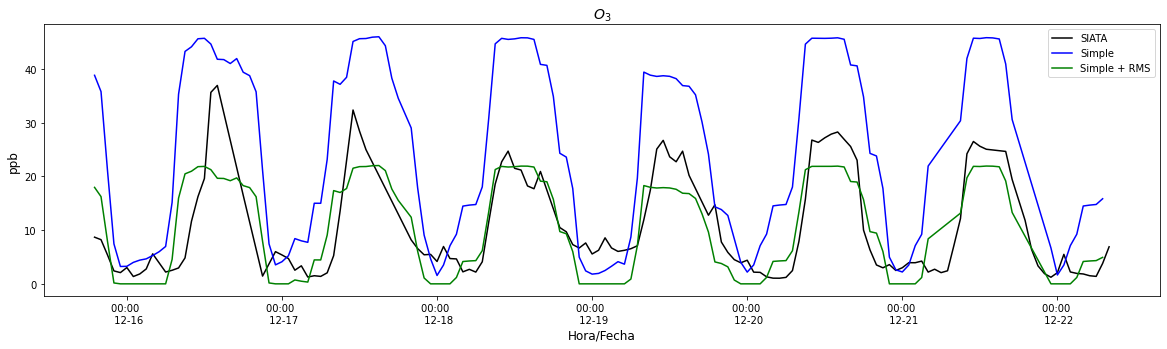

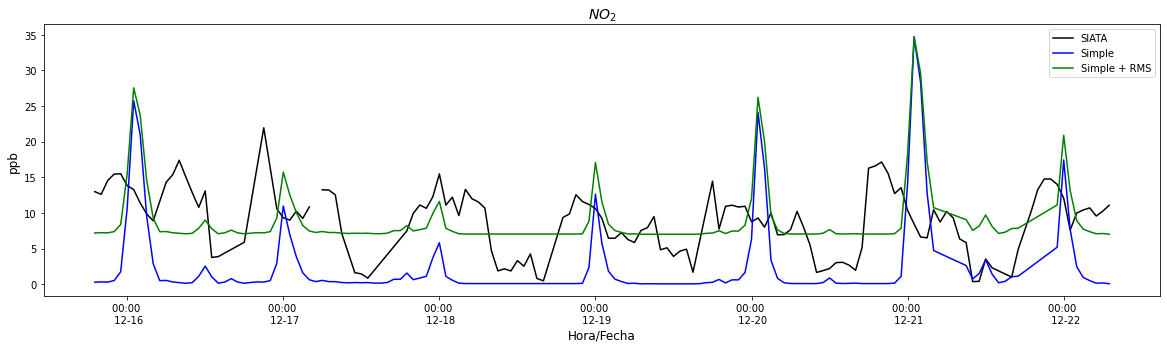

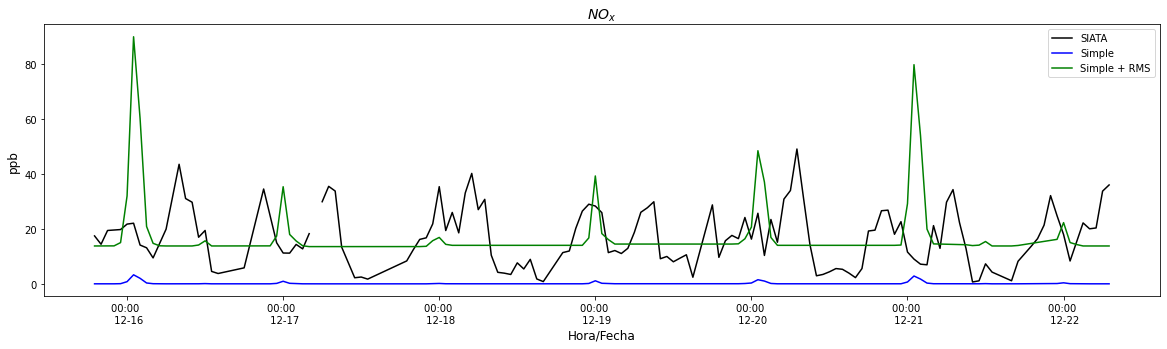

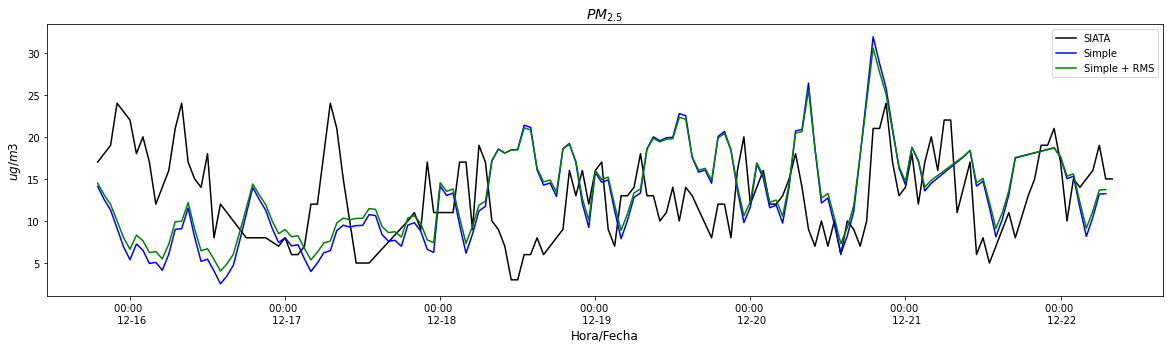

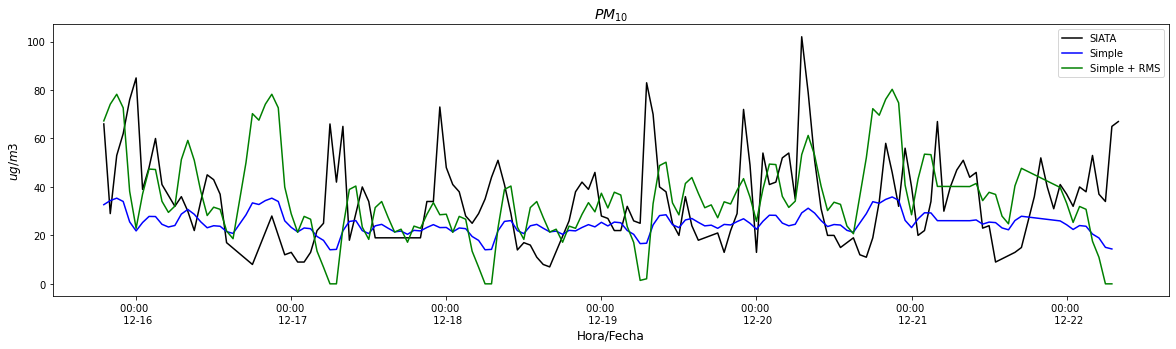

In [62]:
#Datos interpolados, con Simple + RMS

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_siata_total.index, df_siata_total["O3"], label= "SIATA", color="black")
ax.plot(df_simple_h.index, df_simple_h["O3"], label= "Simple", color="blue")
ax.plot(S4_Corregido.index, S4_Corregido["O3"], label= "Simple + RMS", color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("ppb", fontsize=12, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax.set_title(r"$O_3$", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()


fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_siata_total.index, df_siata_total["NO2"], label= "SIATA", color="black")
ax.plot(df_simple_h.index, df_simple_h["NO2"], label= "Simple", color="blue")
ax.plot(S4_Corregido.index, S4_Corregido["NO2"], label= "Simple + RMS", color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("ppb", fontsize=12, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax.set_title(r"$NO_2$", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_siata_total.index, df_siata_total["NOx"], label= "SIATA", color="black")
ax.plot(df_simple_h.index, df_simple_h["NOx"], label= "Simple", color="blue")
ax.plot(S4_Corregido.index, S4_Corregido["NOx"], label= "Simple + RMS", color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel("ppb", fontsize=12, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax.set_title(r"$NO_x$", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_siata_total.index, df_siata_total["PM2_5"], label= "SIATA", color="black")
ax.plot(df_simple_h.index, df_simple_h["PM2_5"], label= "Simple", color="blue")
ax.plot(S4_Corregido.index, S4_Corregido["PM2_5"], label= "Simple + RMS", color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m3$", fontsize=12, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax.set_title(r"$PM_{2.5}$", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.plot(df_siata_total.index, df_siata_total["PM10"], label= "SIATA", color="black")
ax.plot(df_simple_h.index, df_simple_h["PM10"], label= "Simple", color="blue")
ax.plot(S4_Corregido.index, S4_Corregido["PM10"], label= "Simple + RMS", color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
ax.set_ylabel(r"$ug/m3$", fontsize=12, color='k')
ax.set_xlabel("Hora/Fecha", fontsize=12, color='k')
ax.set_title(r"$PM_{10}$", fontsize=14, color='k')
plt.legend(loc=0)
plt.show()

In [65]:
def move_column_auto_shift(df_to_move, reference_df, column_name, unit):
    shift_value = np.max(reference_df[column_name]) - np.max(df_to_move[column_name])
    print("shift", shift_value)
    df_moved = df_to_move.copy()
    df_moved[column_name] = df_to_move[column_name] + shift_value
    rms1 = np.sqrt(np.mean(df_moved[column_name]**2))
    rms2 = np.sqrt(np.mean(reference_df[column_name]**2))
    rms = rms2 / rms1
    print("rms", rms)
    df_moved[column_name] = df_moved[column_name]*rms
    for j in range(0,len(df_moved[column_name])):
        if df_moved[column_name][j]<0:
            df_moved[column_name][j]=0
    fig = plt.figure(figsize=(20,5))
    ax=fig.add_subplot(111)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %n %m-%d'))
    ax.plot(df_to_move.index, df_to_move[column_name], label="Simple", color="b")
    ax.plot(df_moved.index, df_moved[column_name], label="Simple Corregida", color="g")
    ax.plot(reference_df.index, reference_df[column_name], label="SIATA", color="k")
    ax.set_title(column_name, fontsize=14, color="k")
    plt.legend()
    ax.set_xlabel("Time/Date")
    ax.set_ylabel(unit)
    plt.show()

    return fig

shift -9.065490489642293
rms 0.6139909729834613


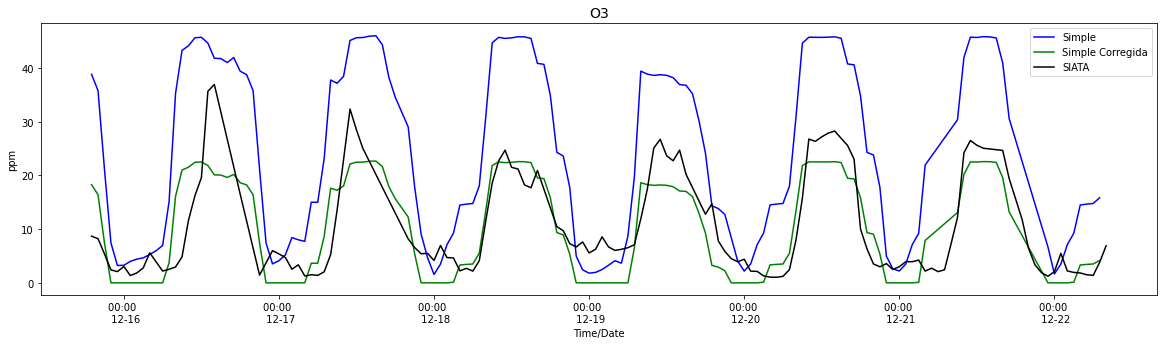

shift -12.777183333333372
rms 0.8402531047272038


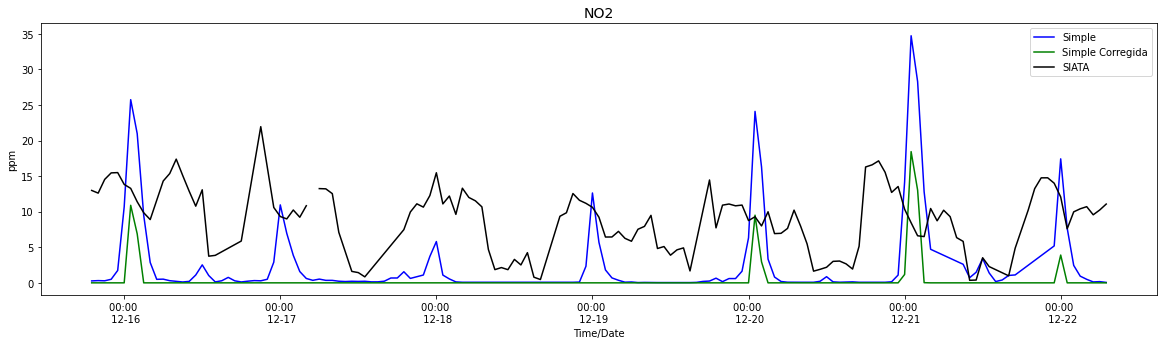

shift 45.840280555555566
rms 0.4359946504813488


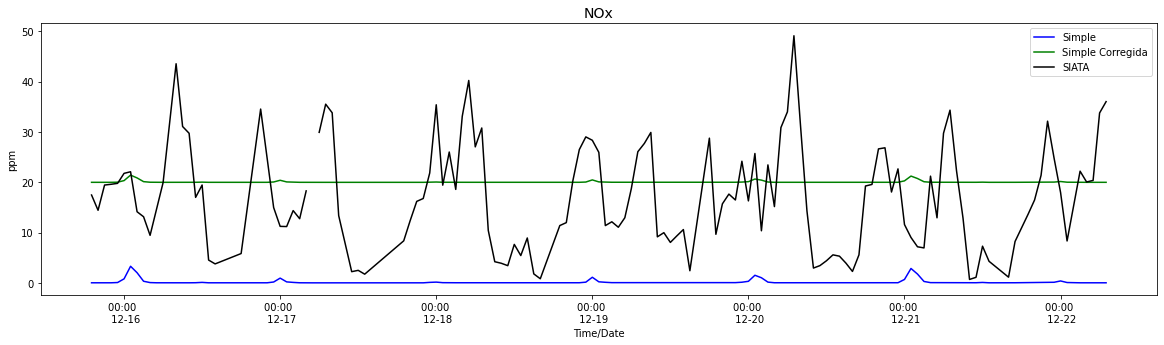

shift -7.902000000000065
rms 1.9109664879616477


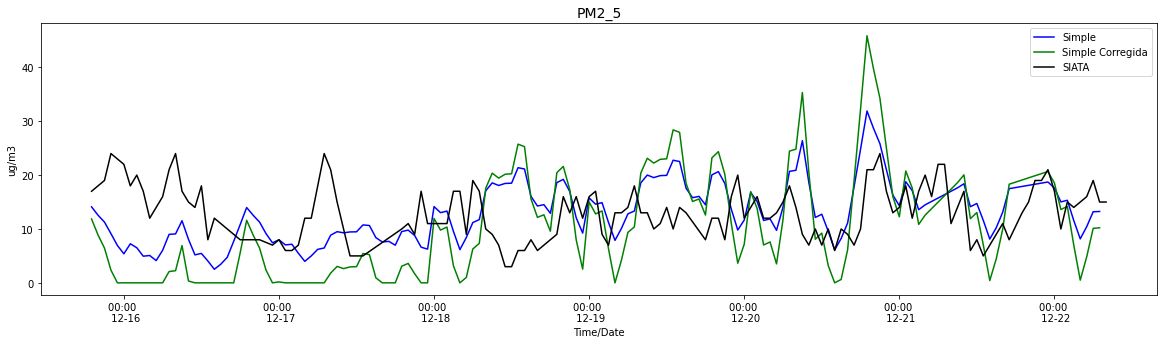

shift 66.12915555555593
rms 0.4405032782085636


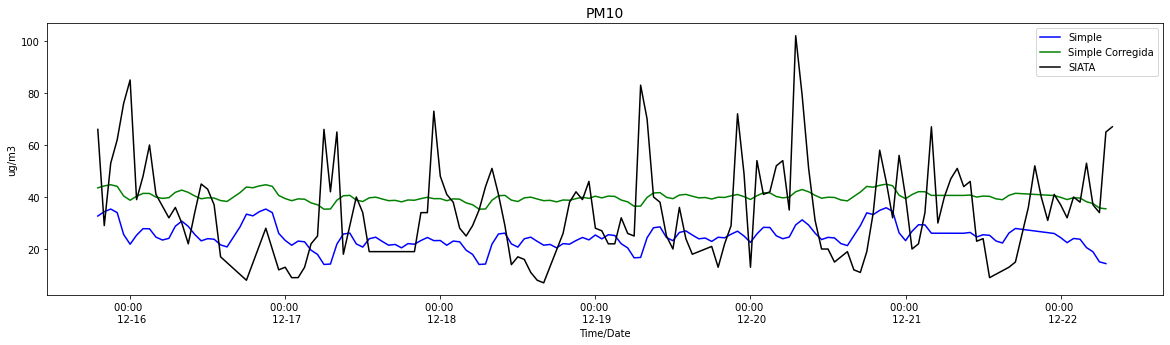

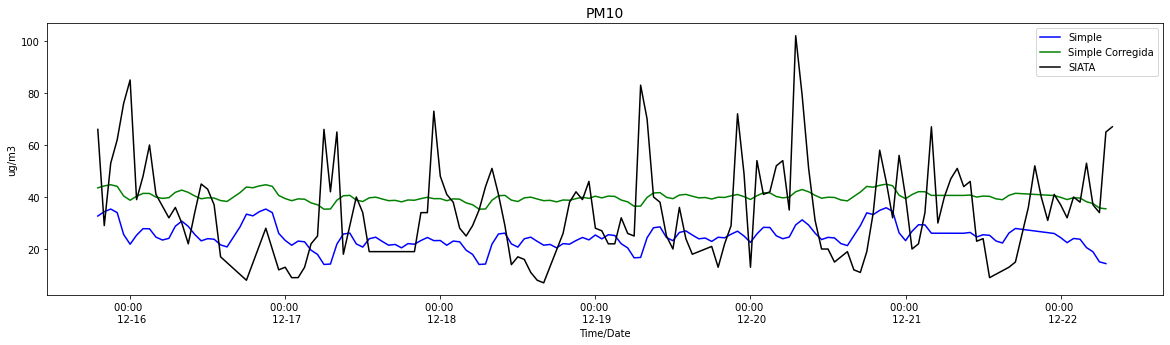

In [66]:
move_column_auto_shift(df_simple_h, df_siata_total, "O3", "ppm")
move_column_auto_shift(df_simple_h, df_siata_total, "NO2", "ppm")
move_column_auto_shift(df_simple_h, df_siata_total, "NOx", "ppm")
move_column_auto_shift(df_simple_h, df_siata_total, "PM2_5", "ug/m3")
move_column_auto_shift(df_simple_h, df_siata_total, "PM10", "ug/m3")

In [380]:
columns = calculate_column_means(df_simple_h["2023-12-21"])
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

ICA PM2_5 55.85 ('yellow', 'Moderate')
ICA PM10 23.95 ('lightgreen', 'Good')
ICA CO 190.55 ('red', 'Unhealthy')
ICA O3 26.13 ('lightgreen', 'Good')
ICA NO2 7.06 ('lightgreen', 'Good')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [383]:
# columns = calculate_column_means(df_siata_total["2023-12-21"])
# for variable in df_siata_total.columns:
#     if variable in pollutant_ranges:
aqi = calculate_aqi(df_siata_total["O3"]["2023-12-16 12:00:00"], "O3", pollutant_ranges)
color = aqi_color(aqi)
print("ICA", "O3", round(aqi,2), color)

ICA O3 18.0 ('lightgreen', 'Good')


In [382]:
columns = calculate_column_means(S4_Corregido["2023-12-21"])
for variable in columns:
    if variable in pollutant_ranges:
        aqi = calculate_aqi(columns[variable], variable, pollutant_ranges)
        color = aqi_color(aqi)
        print("ICA", variable, round(aqi,2), color)

ICA PM2_5 56.55 ('yellow', 'Moderate')
ICA PM10 36.44 ('lightgreen', 'Good')
ICA NO2 12.25 ('lightgreen', 'Good')
ICA O3 11.17 ('lightgreen', 'Good')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [427]:
aqi = calculate_aqi(np.mean(df_simple_h["O3"]["2023-12-21 11:00:00":"2023-12-21 18:00:00"]), "O3", pollutant_ranges)
color = aqi_color(aqi)
print("Simple ICA", "O3", round(aqi,2), color)
aqi = calculate_aqi(np.mean(df_siata_total["O3"]["2023-12-21 11:00:00":"2023-12-21 18:00:00"]), "O3", pollutant_ranges)
color = aqi_color(aqi)
print("Siata ICA", "O3", round(aqi,2), color)
aqi = calculate_aqi(np.mean(S4_Corregido["O3"]["2023-12-21 11:00:00":"2023-12-21 18:00:00"]), "O3", pollutant_ranges)
color = aqi_color(aqi)
print("Corregido ICA", "O3", round(aqi,2), color)

Simple ICA O3 39.72 ('lightgreen', 'Good')
Siata ICA O3 21.36 ('lightgreen', 'Good')
Corregido ICA O3 18.36 ('lightgreen', 'Good')


In [429]:
# df_simple_h["O3"]["2023-12-16"]

In [440]:
print("Simple")
for var in S4_Corregido:
    simple_avg = np.mean(df_simple_h[var]["2023-12-21"])
    print(var, round(simple_avg,2))
    
print("SIATA")
for var in S4_Corregido:
    siata_avg = np.mean(df_siata_total[var]["2023-12-21"])
    print(var, round(siata_avg,2))
    
print("Simple Corregida")
for var in S4_Corregido.columns:
    simplec_avg = np.mean(S4_Corregido[var]["2023-12-21"])
    print(var, round(simplec_avg,2))

Simple
PM2_5 14.83
PM10 25.87
NOx 0.39
NO2 7.48
O3 28.22
SIATA
PM2_5 14.67
PM10 34.52
NOx 14.49
NO2 8.01
O3 9.8
Simple Corregida
PM2_5 15.15
PM10 39.35
NOx 22.83
NO2 12.98
O3 12.07
